In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

stu_adm = pd.read_csv('stud.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('univ.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

df = pd.DataFrame(0, index = all_depid , columns=all_stuid)

In [0]:
pairs = stu_adm.loc[:, 'department_id':'student_id']

for i in range(len(pairs)):
    dep_id = pairs.iloc[i]['department_id']
    stu_id = pairs.iloc[i]['student_id']
    df[stu_id][dep_id] = 1

- Q1.1
  - Remove rows where departments accept less than 10 students
  - Remove columns where students apply for less than 1 department
  - Repeat the steps and report the final numbers of students and departments

In [17]:
while 1:
  dep_count = df.sum(axis=1)
  del_list = []
  for i in range(len(dep_count)):
    if dep_count.iloc[i] < 10: del_list.append(dep_count.index[i])
  if len(del_list) == 0: break
  pd.DataFrame.drop(df, index=del_list, inplace = True)

  stu_count = df.sum(axis=0)
  del_list = []
  for i in range(len(stu_count)):
    if stu_count.iloc[i] <= 1: del_list.append(stu_count.index[i])
  if len(del_list) == 0: break
  pd.DataFrame.drop(df, columns=del_list, inplace = True)
print(df)
print("There are 1917 departments and 47386 students left.")

        10246842  10042237  10008031  ...  10052131  10108905  10014322
001012         1         1         1  ...         0         0         0
001022         1         0         1  ...         0         0         0
001032         1         0         0  ...         0         0         0
001042         0         0         0  ...         0         0         0
001052         0         0         0  ...         0         0         0
...          ...       ...       ...  ...       ...       ...       ...
150122         0         0         0  ...         0         0         0
150132         0         0         0  ...         1         0         0
150142         0         0         0  ...         1         0         0
151012         0         0         0  ...         0         1         1
151022         0         0         0  ...         0         1         1

[1917 rows x 47386 columns]
There are 1917 departments and 47386 students left.


- Q1.2
  - Show the 10 departments received most applications, their name, their id, and the number of applications

In [4]:
dep_count = df.sum(axis=1)
ten_most = dep_count.nlargest(10).index

for i in ten_most:
  obj = uname.loc[uname['department_id'] == i]
  name = obj['school_name_abbr'].values + obj['department_name_abbr'].values
  print(name[0], ", dep. id =", i, ", # of applications: ", dep_count[i])



中原機械工程學 , dep. id = 008122 , # of applications:  386
中醫藥學 , dep. id = 012052 , # of applications:  376
銘傳會計（臺北） , dep. id = 046032 , # of applications:  367
成大電機 , dep. id = 004382 , # of applications:  357
東吳企業管理 , dep. id = 005192 , # of applications:  353
中原土木 , dep. id = 008112 , # of applications:  353
東吳會計 , dep. id = 005182 , # of applications:  351
逢甲財金 , dep. id = 015342 , # of applications:  340
義守電機 , dep. id = 045012 , # of applications:  339
逢甲資工 , dep. id = 015222 , # of applications:  329


- Q2.1
  - PCA with 8 principle components
  - The pairplot() function of seaborn library provides plots of every two components


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)
pca.fit(df)
newX = pca.fit_transform(df)


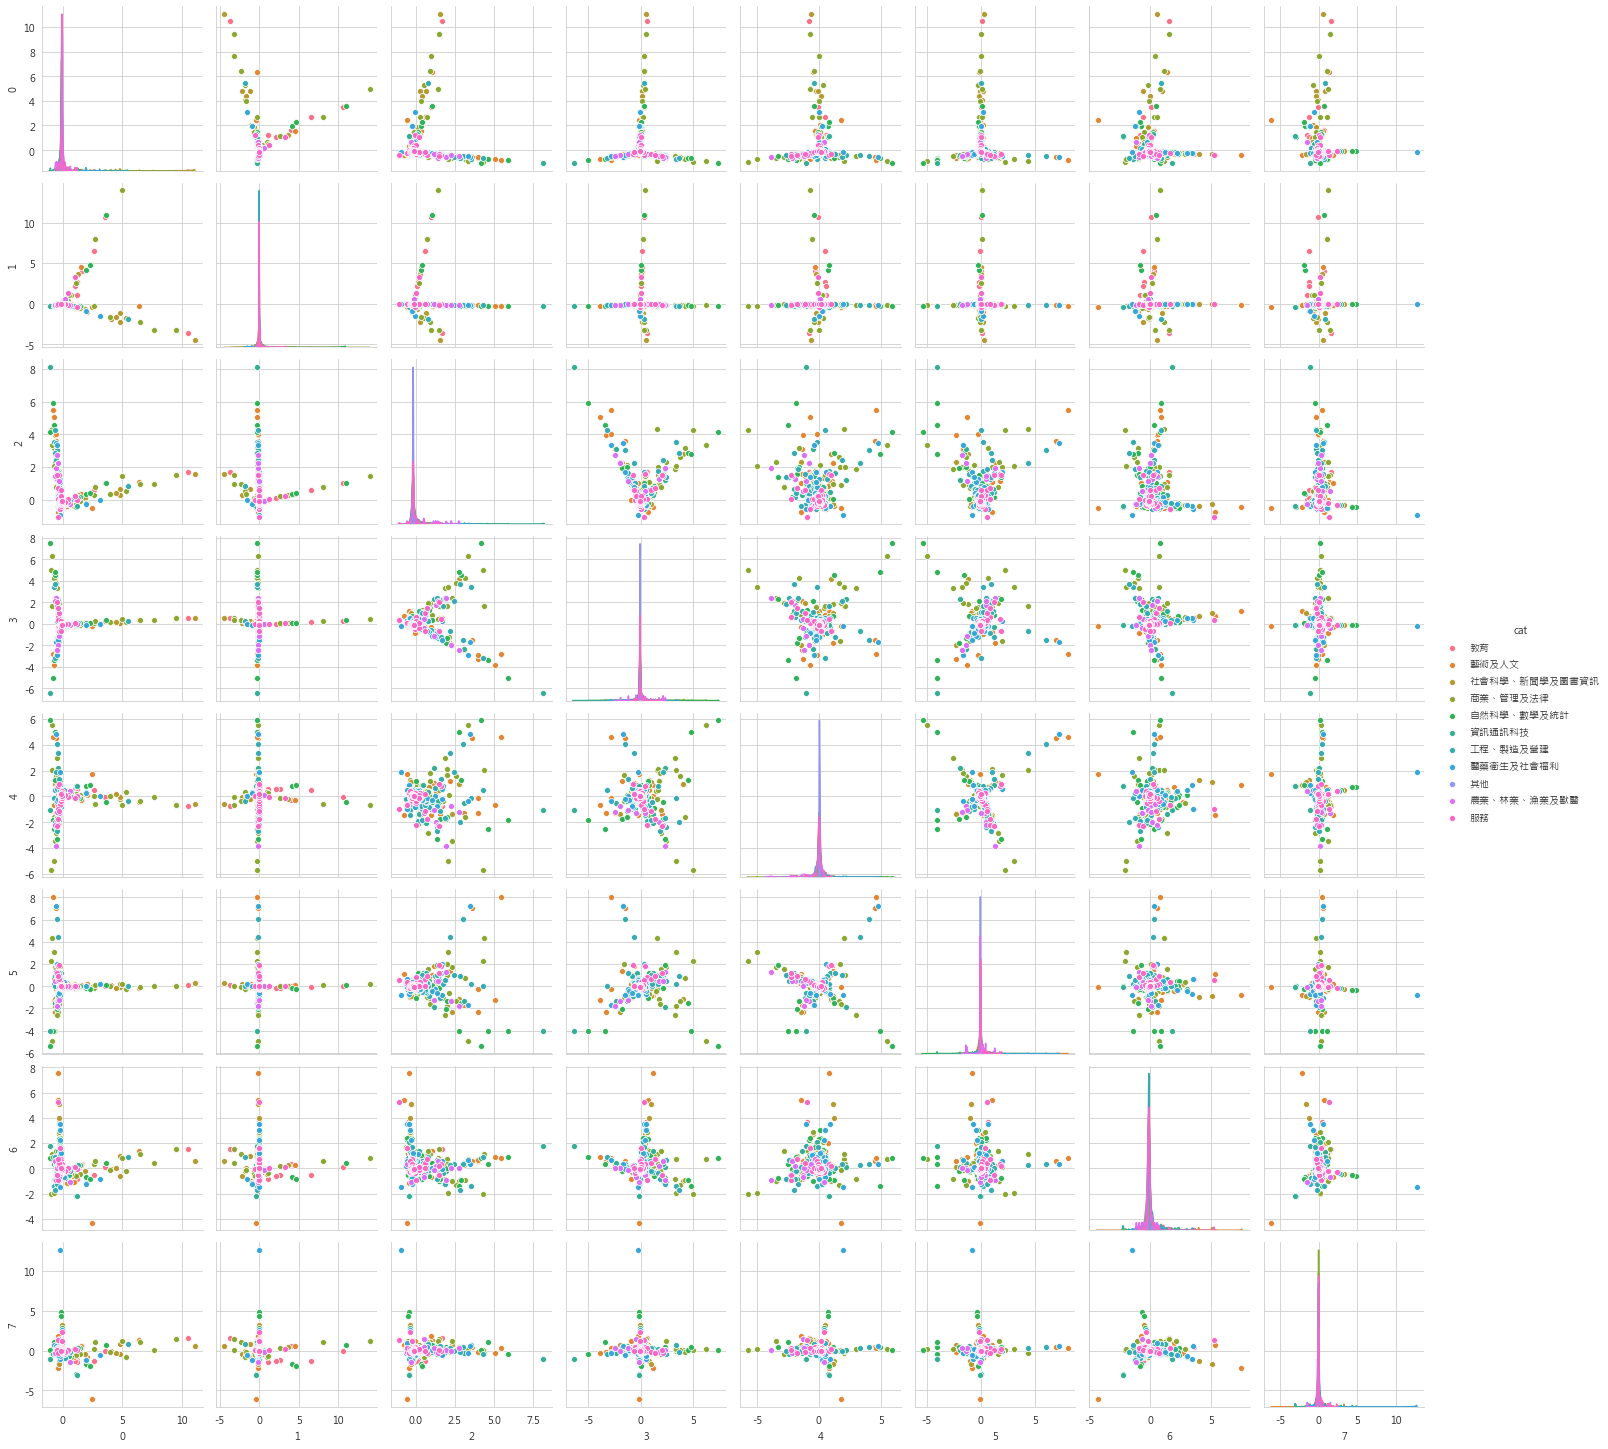

In [19]:
import seaborn as sns
import matplotlib as plt
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

fm.fontManager.addfont('/content/drive/My Drive/Colab Notebooks/msjh.ttf')

sns.set_style("whitegrid", {"font.sans-serif":['Microsoft JhengHei']})
plt.rcParams['axes.unicode_minus'] = False

cat = uname.loc[uname['department_id'].isin(df.index)]['category_name']
df_new = pd.DataFrame(newX)
df_new['cat'] = cat
sns.pairplot(df_new,'cat')

- 前幾個主成分的分群能力比較好

- Q2.2
  - Multiple dimensional scaling with 2 components
  - Plot with settings of metric and non-metric

In [0]:
from sklearn.manifold import MDS

embedding1 = MDS(n_components=2, metric=True)
embedding2 = MDS(n_components=2, metric=False)

newX1 = embedding1.fit_transform(df)
newX2 = embedding2.fit_transform(df)


In [0]:
df_new1 = pd.DataFrame(newX1)
df_new1['cat'] = cat

df_new2 = pd.DataFrame(newX2)
df_new2['cat'] = cat

- metric=True

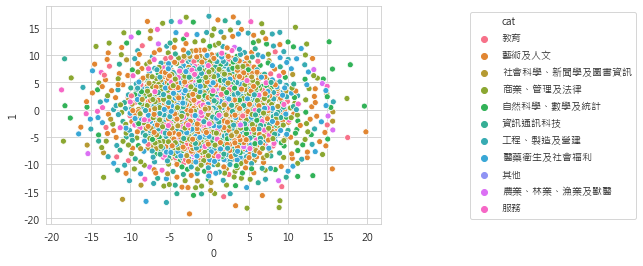

In [45]:
g1 = sns.scatterplot(x=df_new1[0], y=df_new1[1], hue = 'cat', data=df_new1)
g1.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

- metric=False

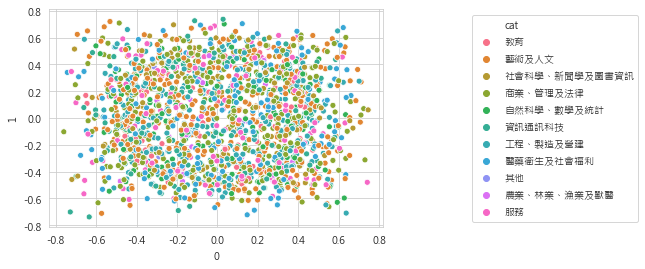

In [61]:
g2 = sns.scatterplot(x=df_new2[0], y=df_new2[1], hue = 'cat', data=df_new2)
g2.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

- Non-metric MDS 顯示各個點的距離分布比metric平均
- metric則顯示部分的資料可能距離比較近

- Q2.3
  - Locally Linear Embedding with 2 components, different numbers of neighbors and PCA preprocessed data.

- 20 neighbors

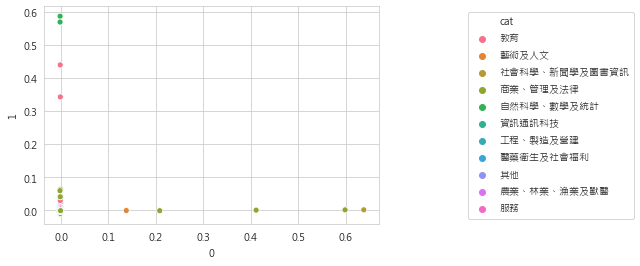

In [7]:
from sklearn.manifold import LocallyLinearEmbedding

lle_20 = LocallyLinearEmbedding(n_neighbors=20, n_components=2)
newX3 = lle_20.fit_transform(df)

df_new3 = pd.DataFrame(newX3)
df_new3['cat'] = cat

g3 = sns.scatterplot(x=df_new3[0], y=df_new3[1], hue = 'cat', data=df_new3)
g3.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

- 40 neighbors

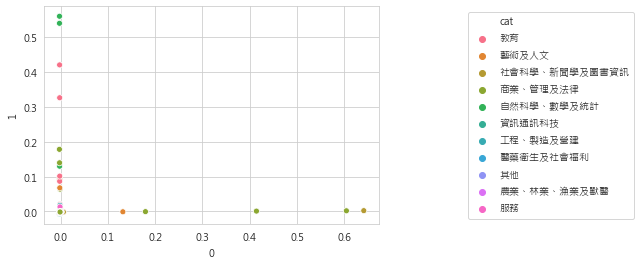

In [8]:
lle_40 = LocallyLinearEmbedding(n_neighbors=40, n_components=2)
newX4 = lle_40.fit_transform(df)

df_new4 = pd.DataFrame(newX4)
df_new4['cat'] = cat

g4 = sns.scatterplot(x=df_new4[0], y=df_new4[1], hue = 'cat', data=df_new4)
g4.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

- 20 neighbors and PCA preprocessed data

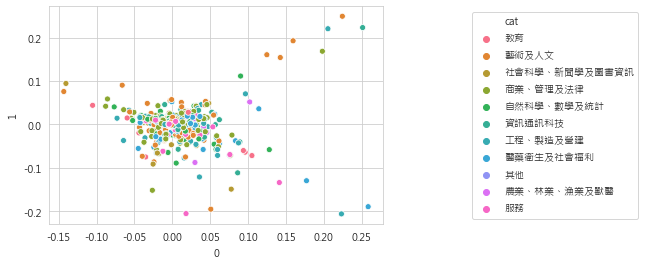

In [11]:
pca = PCA(n_components = 100)
newX = pca.fit_transform(df)

lle_PCA = LocallyLinearEmbedding(n_neighbors=20, n_components=2)
newX5 = lle_PCA.fit_transform(newX)

df_new5 = pd.DataFrame(newX5)
df_new5['cat'] = cat

g5 = sns.scatterplot(x=df_new5[0], y=df_new5[1], hue = 'cat', data=df_new5)
g5.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

- 取40個neighbor的分群能力看起來比取20個neighbor好一點
- 經PCA處理後的LLE則有一群較明顯的資料點

- Q2.4
  - Kernel PCA with 8 components
  - Using RBF and Cosine Kernel

- RBF Kernel

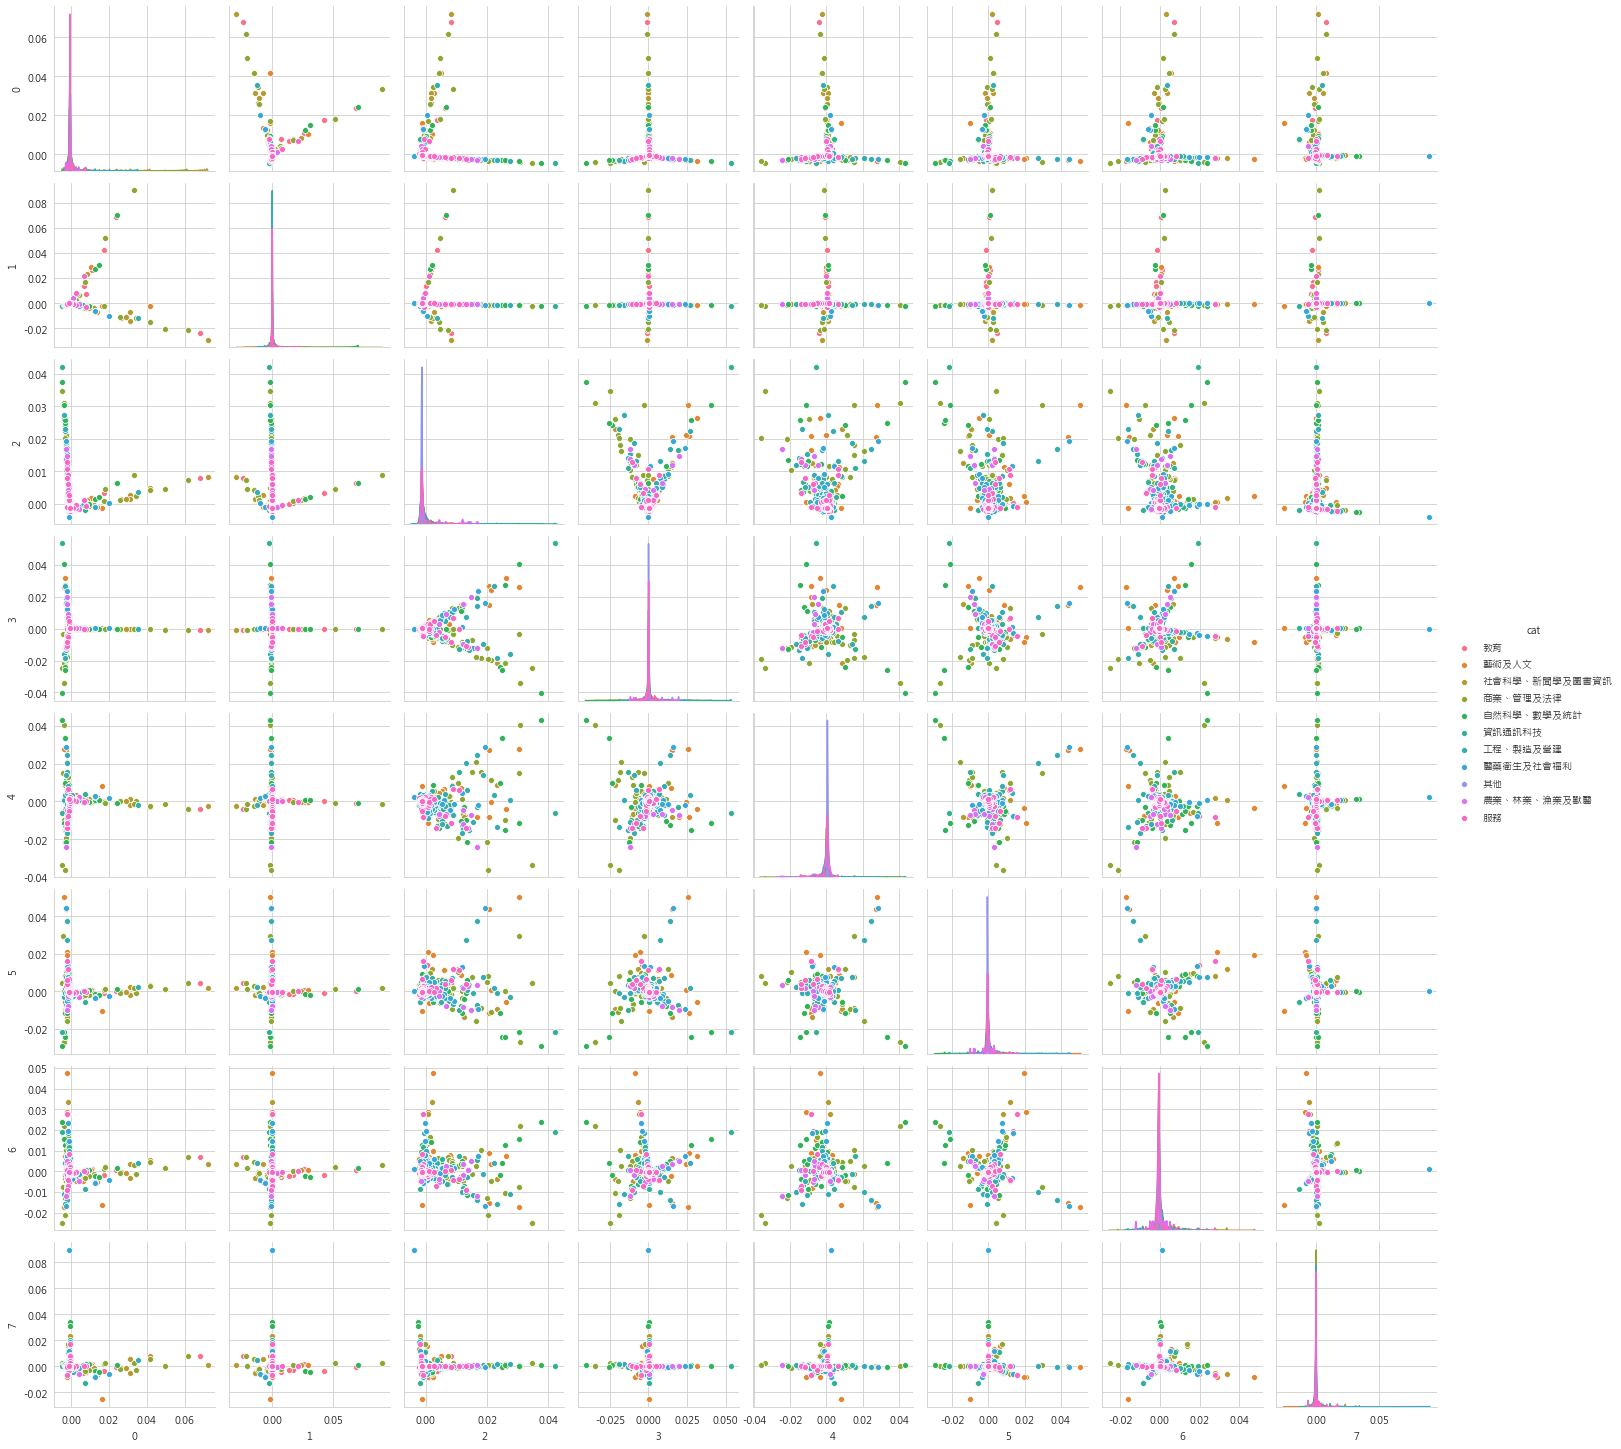

In [34]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=8, kernel='rbf')
newX6 = kpca.fit_transform(df)

df_new6 = pd.DataFrame(newX6)
df_new6['cat'] = cat
sns.pairplot(df_new6,'cat')

- Cosine Kernel

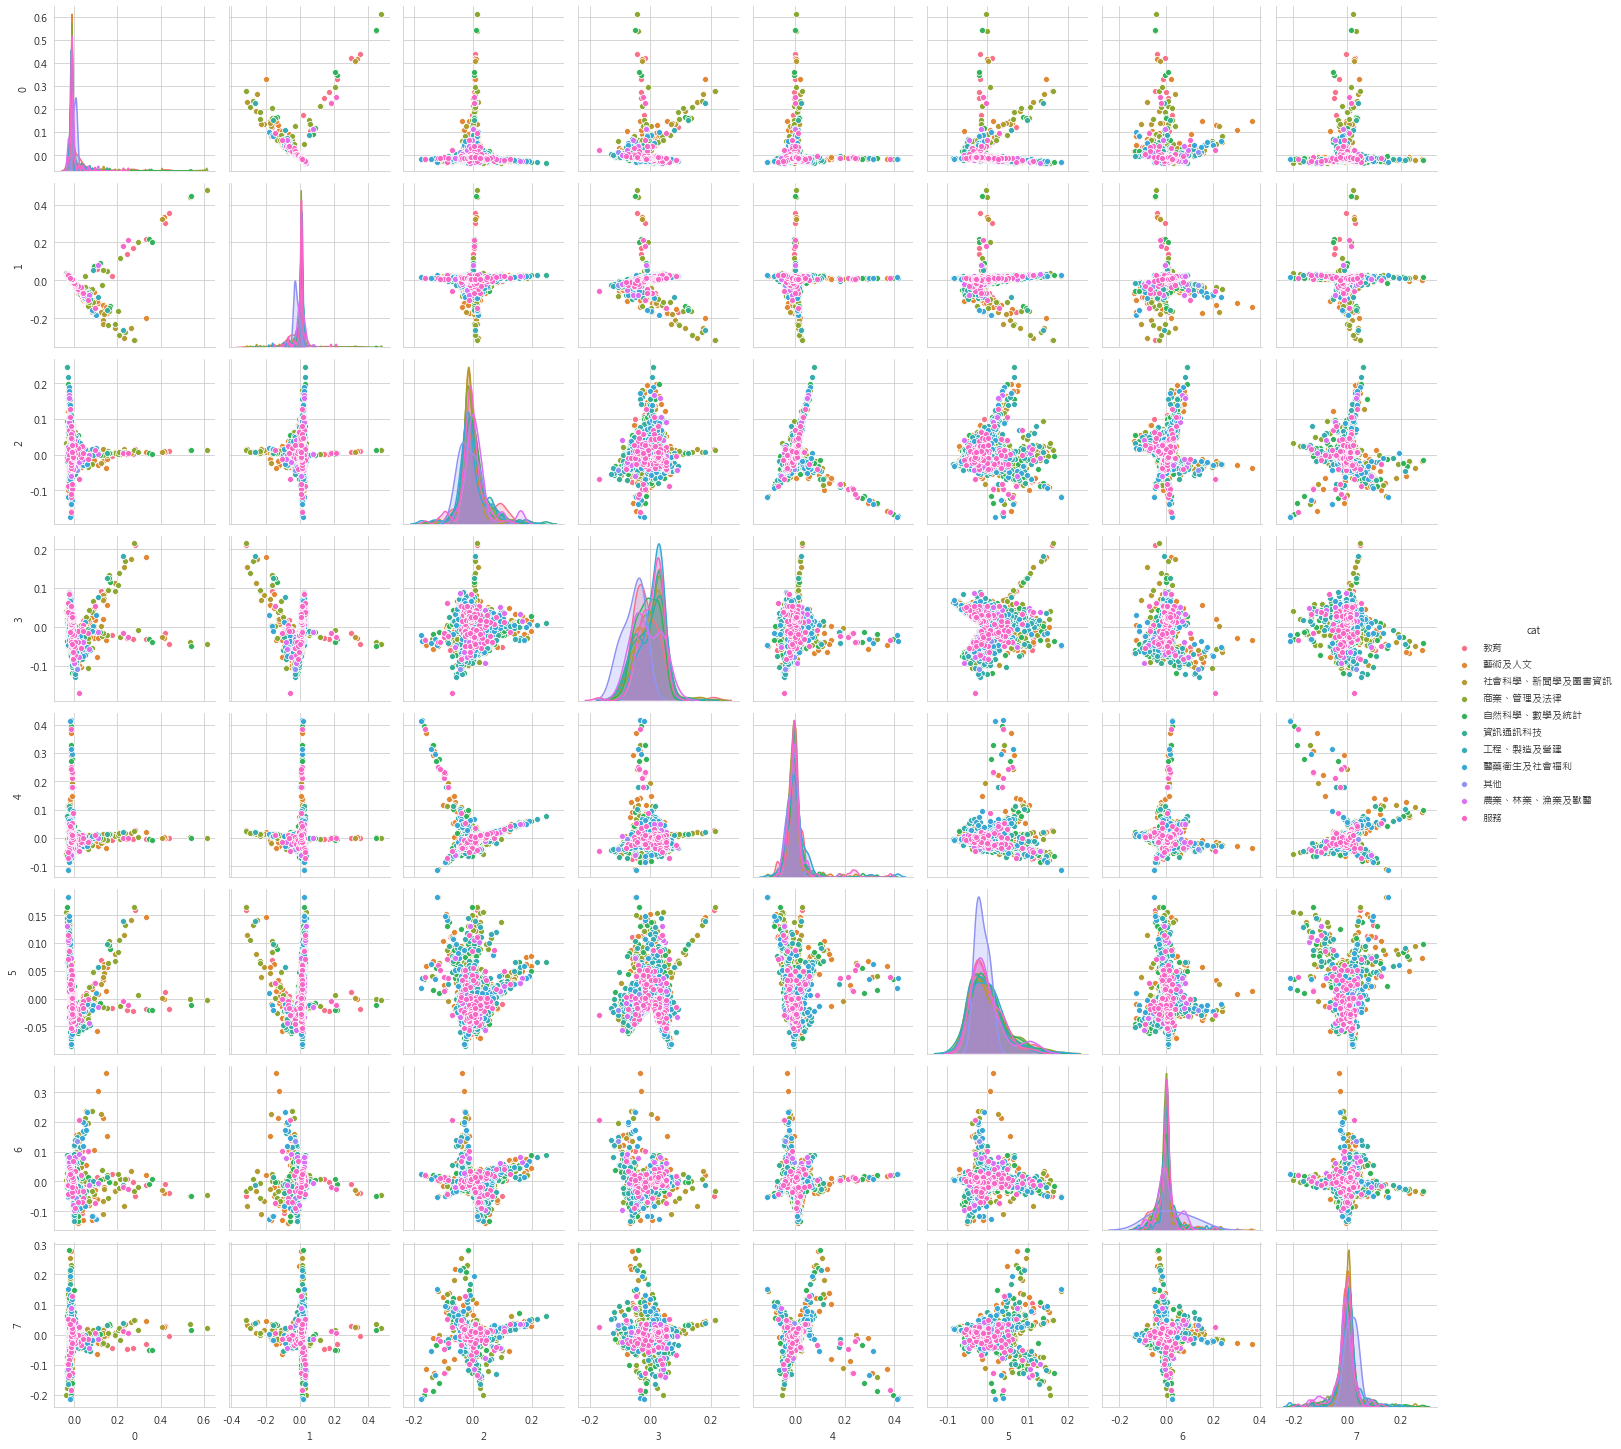

In [25]:
from sklearn.decomposition import KernelPCA
import seaborn as sns

kpca = KernelPCA(n_components=8, kernel='cosine')
newX7 = kpca.fit_transform(df)

df_new7 = pd.DataFrame(newX7)
df_new7['cat'] = cat
sns.pairplot(df_new7,'cat')

- 前幾個主成分的分群能力較好
- Kernel PCA的分群看起來比PCA明顯
- rbf的分群看起來比cosine明顯

- Q2.5
  - t-SNE with 8 components
  - Using metrics of Euclidean, Cosine, and Jaccard

- Euclidean

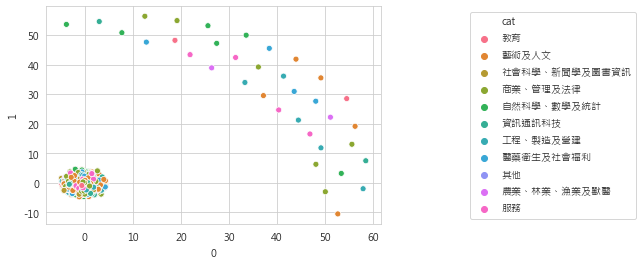

In [14]:
from sklearn.manifold import TSNE

newX8 = TSNE(n_components=2).fit_transform(df)

df_new8 = pd.DataFrame(newX8)
df_new8['cat'] = cat

g8 = sns.scatterplot(x=df_new8[0], y=df_new8[1], hue = 'cat', data=df_new8)
g8.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

- Cosine

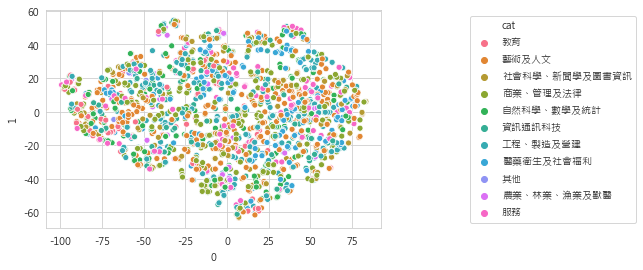

In [63]:
from sklearn.manifold import TSNE
newX9 = TSNE(n_components=2, metric="cosine").fit_transform(df)

df_new9 = pd.DataFrame(newX9)
df_new9['cat'] = cat

g9 = sns.scatterplot(x=df_new9[0], y=df_new9[1], hue = 'cat', data=df_new9)
g9.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

- Jaccard

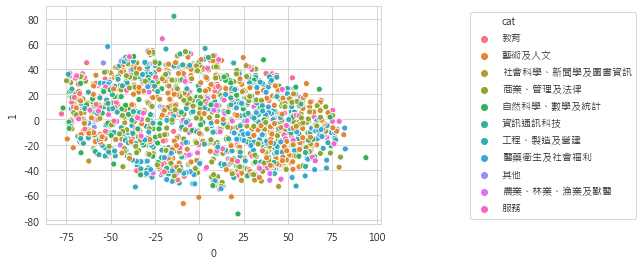

In [64]:
newX10 = TSNE(n_components=2, metric="jaccard").fit_transform(df)

df_new10 = pd.DataFrame(newX10)
df_new10['cat'] = cat

g10 = sns.scatterplot(x=df_new10[0], y=df_new10[1], hue = 'cat', data=df_new10)
g10.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

- Euclidean metric明顯的有一資料群
- Cosine看起來也有部分資料分群, jaccard就沒那麼明顯